Osnabrück University - Computer Vision (Winter Term 2021/22) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 06: Hough Transform

## Introduction

This week's sheet should be solved and handed in before **14:00 of Tuesday, December 14, 2021**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

**HINT: There is a bonus exercise in the end. If you do this bonus exercise you may leave out one of the other exercises.**

## Assignment 0: Math recap (Eigenvectors and Eigenvalues) [0 Points]

This exercise is supposed to be very easy, does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is an eigenvector of a matrix/a linear mapping? What are eigenvalues?

YOUR ANSWER HERE

**b)** What is the characteristic polynomial of a matrix? How is it related to eigenvalues? What are algebraic and geometric multiplicity of an eigenvalue?

YOUR ANSWER HERE

**c)** What is the spectrum of a matrix? What does the spectral theorem state?

YOUR ANSWER HERE

**d)** [bonus task]: Numpy/Scipy provide functions to compute eigenvalues. Lookup these functions and apply them to an example.

In [ ]:
# YOUR CODE HERE

## Assignment 1: Hough transform [7 Points]

**a)** Explain in your own words the idea of Hough transform in general. What is an accumulator space? In what sense can the Hough transform be seen as a model-based approach?

The idea behind Hough Transform is to detect certain periodicities from an input and transfer these into a transformed data space, so called Hough Space. In the context of computer vision, it transforms values of an image as input into different data points in the accumulator space. Looking at the detection of straight lines as an example, it accumulates for each edge point the function that describes the parameters of all possible linear functions that cross this edge point.


**b)** What is linear Hough transform? What does a point in the linear Hough space represent? Explain the meaning of the two coordinates.

The linear Hough transform estimates the two parameters that define a straight/linear line in a 2 dimensional coordinate system. The transform space also has two dimensions, and every point in the transform space is used as an accumulator to detect or identify a line in the original image. Every point in the detected edges in the image contributes to the accumulators. Each element in the accumulator space has a value equal to the sum of the points or pixels that are positioned on the line represented by the quantized parameters (r, θ). A high value then represents a line in the original image.

**c)**  How are points, lines, polygons transformed by linear Hough transform? What about parallel lines? Try different configurations using the functions `point`, `line`, `polygon` below. Use the function `skimage.transform.hough_line` to display these examples. You may use the code of Assignment 2 to check
different configurations interactively.

1. Points: when adding points, there are as many intersections as there are pairs of points. This makes sense as each of these pairs of points has to be connectable by a linear function.
2. Line: for lines there is one point in which all sin-lines intersect. This makes sense because the points on a line have to share some parameter in the accumulator space to form a line.
3. Parallel line: parallel lines have their respective main intersection (in the accumulator space) at different places. However, the intersections share the same angle which makes sense since parallel lines have the same angle, else they wouldn't be parallel.
4. Polygons: one can detect as many main intersections in hough space as there are corners in the polygon. All other intersections have a somewhat different angle.

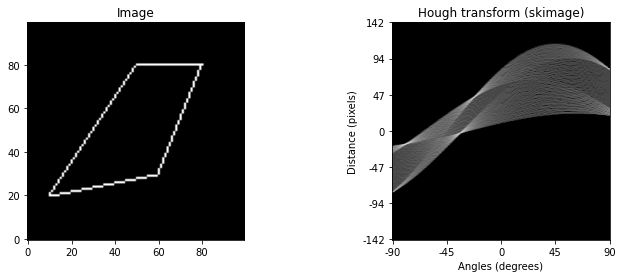

In [1]:
from skimage.transform import hough_line
from skimage.transform import resize
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

steps = lambda p,q : max(map(lambda x,y: abs(x-y), p, q))+1
coords = lambda p,q,s : tuple([np.linspace(x,y,s,dtype=np.uint16) for x,y in zip(p,q)])

def point(img, p):
    """Insert a point in the black/white image at position p
    
    Args:
        img (ndarray): Input image.
        p (tuple): Coordinate of point.
    
    Returns:
    
    """
    img[p] = 1

def line(img, p, q):
    """Insert a line from p to q in the black/white image
    
    Args:
        img (ndarray): Input image.
        p (tuple): Coordinate of start position.
        q (tuple): Coordinate of end position.
    
    Returns:
    
    """
    img[coords(p,q,steps(p,q))] = 1

def polygon(img, vertices):
    """Insert a (closed) polygon given by a list of points into the black/white image
    
    Args:
        img (ndarray): Input image.
        vertices (list): List of coordinate tuples.
    
    Returns:
    
    """
    for p, q in zip(vertices, vertices[1:]+vertices[0:1]):
        line(img,p,q)

img = np.zeros((100,100))

# YOUR CODE HERE
# trying out different configurations

#point(img, (10,10))

# parallel lines
#line(img,(20,20),(20,80))
#line(img,(40,20),(40,80))

# line crossing the above
#line(img,(20,80),(80,20))

polygon(img,[(20,10),(80,50),(80,80),(30,60)])



fig, [ax1, ax2] = plt.subplots(1,2, figsize=(12,4))

plt.gray()
ax1.set_title('Image'); 
ax1.imshow(img, origin = 'lower')

out, angles, d = hough_line(img)

# scale output to quadratic image
out_resized = resize(out, (out.shape[0], out.shape[0]), anti_aliasing=True, preserve_range=True)
ax2.set_title('Hough transform (skimage)');
ax2.set_xlabel('Angles (degrees)')
ax2.set_ylabel('Distance (pixels)')
ax2.imshow(np.log(1 + out_resized), origin = 'lower', cmap='gray')

ax2.set_yticks(np.linspace(0, out.shape[0], 7))
ax2.set_yticklabels((-1 * np.linspace(d[-1], d[0], 7)).astype(int))
ax2.set_xticks(np.linspace(0, out.shape[0], 5))
ax2.set_xticklabels(np.linspace(np.rad2deg(angles[0]), np.rad2deg(angles[-1]), 5).astype(int))


plt.show()

## Assignment 2: Interactive Hough transform [1 Point] 

The following code block implements an interactive Hough transform, in which you can either draw points or lines and can see the resulting Hough transform immediately. Draw different shapes of points or lines and check the resulting Hough transform. Try to predict the outcome of the transformation!

<IPython.core.display.Javascript object>


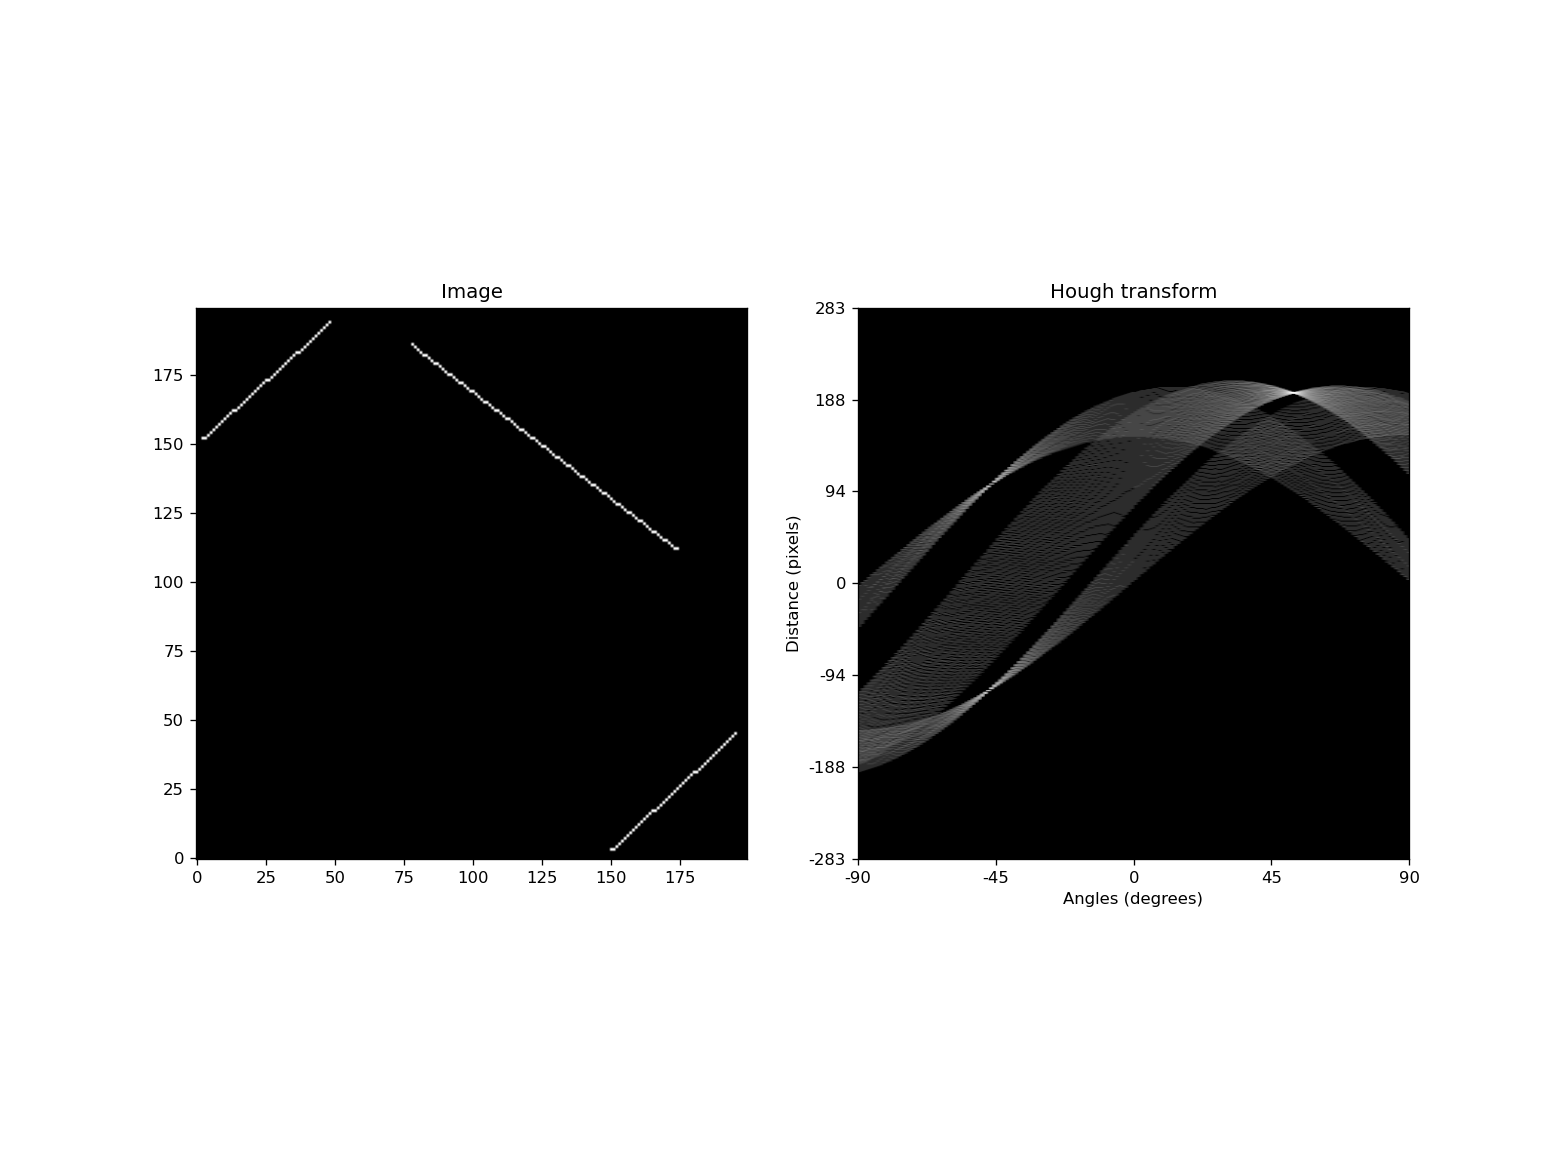

9

In [2]:
%matplotlib notebook
from skimage.transform import hough_line
import matplotlib.pyplot as plt
import numpy as np

# True if two mouse clicks should draw a line, false if single clicks draw points
lines = True


steps = lambda p,q : max(map(lambda x,y: abs(x-y), p, q))+1
coords = lambda p,q,s : tuple([np.linspace(x,y,s,dtype=np.uint16) for x,y in zip(p,q)])
img = np.zeros((200,200))


def line(img, p, q):
    """Insert a line from p to q in the black/white image
    
    Args:
        img (ndarray): Input image.
        p (tuple): Coordinate of start position.
        q (tuple): Coordinate of end position.
    
    Returns:
    
    """
    img[coords(p,q,steps(p,q))] = 1
    

def disp_and_comp():
    """Computes Line Hough transform; displays image and result
    
    Args:
    
    Returns:
    
    """
    ax1.imshow(img, origin = 'lower', cmap='gray')
    
    out, angles, d = hough_line(img)
    
    out_resized = resize(out, (out.shape[0], out.shape[0]), anti_aliasing=True, preserve_range=True)
    ax2.imshow(np.log(1 + out_resized), origin = 'lower', cmap='gray')
    ax2.set_yticks(np.linspace(0, out.shape[0], 7))
    ax2.set_yticklabels((-1 * np.linspace(d[-1], d[0], 7)).astype(int))
    ax2.set_xticks(np.linspace(0, out.shape[0], 5))
    ax2.set_xticklabels(np.linspace(np.rad2deg(angles[0]), np.rad2deg(angles[-1]), 5).astype(int))
    
    fig.canvas.draw()

    
first_point = True
p1 = (0,0)
def on_press(event):
    """Draws either line or point and calls disp_and_comp
    
    Reacts to mouse clicks. Draws either point at mouse
    position and computes Hough transform or draws line
    between first and second mouse click and then computes
    hough transfom.
    
    Args:
        event (event): Mouseevent.
    
    Returns:
    
    """
    global p1, first_point
    y = int(event.xdata)
    x = int(event.ydata)
    
    if (lines):
        if (first_point):
            p1 = (x,y)
            img[x, y] = 255
            first_point = False
        else:
            line(img,p1,(x,y)) 
            first_point = True
        disp_and_comp()
    else:
        img[x, y] = 255
        disp_and_comp()
    
    

fig = plt.figure(figsize=(8, 6))

ax1 = fig.add_subplot(121)
plt.title('Image')

ax2 = fig.add_subplot(122)
plt.title('Hough transform');
plt.xlabel('Angles (degrees)')
plt.ylabel('Distance (pixels)')


disp_and_comp()
#plt.axis('square')
fig.canvas.mpl_connect('button_press_event', on_press)

# YOUR CODE HERE

For three types of lines, the respective hough transform (at least its theta-value) is easy to predict:
- horizontal lines cause maxima at the edges of the hough transform, so at -90° and 90°
- vertical lines cause maxima at 0°
- diagonal lines cause maxima at 45° (when from top left to bottom right) or -45° (from top right to bottom left)


Other lines fall somewhere in between these and the distance value of the hough transform's maxima is determined by the distance of the line from the origin.

## Assignment 3: Implementing Hough transform [7 Points]

**a)** Implement your own version of linear Hough transform and compare the results with the function `skimage.transform.hough_line`.

r:  -19.0
r_index:  123
0.0


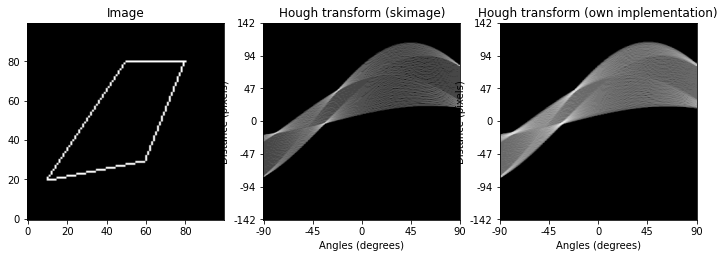

In [3]:
from skimage.transform import hough_line
from scipy import ndimage
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def my_hough_line(img, angles=180):
    """
    Apply linear Hough transform to the given image.
    
    Args:
        img (numpy.ndarray): The binary image to transform
        angles (int): The number of angles to consider.
    Result:
        accumulator (numpy.ndarray): The accumulator space.
    """
    # edge point detection
    vertical_sobel = ndimage.sobel(img, 1)
    horizontal_sobel = ndimage.sobel(img, 0)
    gradient_magnitudes = np.hypot(vertical_sobel, horizontal_sobel)
    #gradient_orientation = np.arctan2(vertical_sobel, horizontal_sobel) * (180/np.pi)
    
    # threshold gradient magnitudes and store sufficient edge points as tuples together with their direction in list M
    sufficient_magnitudes = gradient_magnitudes >= 1.5
    edge_point_coordinates = []
    for i, row in enumerate(sufficient_magnitudes):
        for j, column in enumerate(row):
            if(sufficient_magnitudes[i,j] == True):
                edge_point_coordinates.append((j, i))
    
    # initializing the accumulator space
    accumulator = np.zeros((284, angles))
    
    # project edge points into accumulator space
    for (x, y) in edge_point_coordinates:
        for theta in range(-90, 90, 1):
            r = x*np.cos(np.deg2rad(theta)) + y*np.sin(np.deg2rad(theta)) + accumulator.shape[0]/2
            # Why +accumulator.shape[0]/2??? E.g. for first edge point and theta=-90: r = -19 -> r_index = 123 but would need to be 142+19 = 161???
            accumulator[round(r), theta+90] += 1
            if(theta == -90 and (x,y) == edge_point_coordinates[0]):
                print('r: ',r-accumulator.shape[0]/2)
                print('r_index: ',round(r))
                print(accumulator[161, 0])
    
    return accumulator


img = np.zeros((100,100))

# You may try different paintings here:
#point(img, (10,10))
#line(img,(10,20),(70,20))
polygon(img,[(20,10),(80,50),(80,80),(30,60)])


fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(12,4))
plt.gray()

# original image
ax1.set_title('Image'); 
ax1.imshow(img, origin = 'lower')

# skimage
out, angles, d = hough_line(img)

out_resized = resize(out, (out.shape[0], out.shape[0]), anti_aliasing=True, preserve_range=True)
ax2.set_title('Hough transform (skimage)');
ax2.set_xlabel('Angles (degrees)')
ax2.set_ylabel('Distance (pixels)')
ax2.imshow(np.log(1 + out_resized), origin = 'lower', cmap='gray')
ax2.set_yticks(np.linspace(0, out.shape[0], 7))
ax2.set_yticklabels((-1 * np.linspace(d[-1], d[0], 7)).astype(int))
ax2.set_xticks(np.linspace(0, out.shape[0], 5))
ax2.set_xticklabels(np.linspace(np.rad2deg(angles[0]), np.rad2deg(angles[-1]), 5).astype(int))

# own implementation
my_out = my_hough_line(img)

my_out_resized = resize(my_out, (my_out.shape[0], my_out.shape[0]), anti_aliasing=True, preserve_range=True)
ax3.set_title('Hough transform (own implementation)');
ax3.set_xlabel('Angles (degrees)')
ax3.set_ylabel('Distance (pixels)')
ax3.imshow(np.log(1 + my_out_resized), origin = 'lower', cmap='gray')
ax3.set_yticks(np.linspace(0, my_out.shape[0], 7))
ax3.set_yticklabels((-1 * np.linspace(d[-1], d[0], 7)).astype(int))
ax3.set_xticks(np.linspace(0, my_out.shape[0], 5))
ax3.set_xticklabels(np.linspace(np.rad2deg(angles[0]), np.rad2deg(angles[-1]), 5).astype(int))

plt.show()


**b)** Under which conditions is (linear) Hough transform invertible? Try to implement an inverse linear Hough transform. 

You could create a line for each point in accumulator space by doing the following: Compute angle and distance of the line represented by the current point in accumulator space. Add the value of this point to all image pixels which belong to the corresponding line. Finally you could threshold the image. 

However, other solution are feasible, too.


Precise inversion is only possible if the image is binary, contains only lines and those lines are continuous, i.e. they span over the whole image. It is also possible to recover images with not continuous line. However, this requires a non-standard hough transform as described in Kesidis & Papamarkos (2019). <br>
In addition to that, for precise inversion it is also needed that the number of maxima in the accumulator space corresponds to the number of lines in the original image.

Otherwise inversion is possible, but the resulting image will only somewhat resemble the original and depends heavily on the chosen threshold (like below).

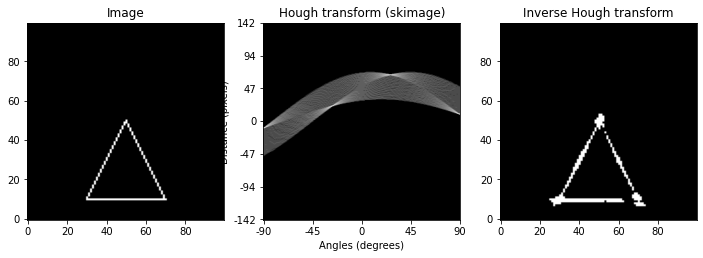

In [145]:
%matplotlib inline 
from skimage.transform import hough_line
import matplotlib.pyplot as plt
import numpy as np




def my_inverse_hough_line(accumulator, shape):
    """Compute an inverse Hough transform, i.e. compute the image from the accumulator space.
    
    Args:
        accumulator (numpy.ndarray)
        shape (tuple): The shape (dimensions) of the image to be created

    Result:
        img (numpy.ndarray): The image created from the accumulator space.
    """
    img = np.zeros(shape, np.uint64)
    #we are only interested in the points from the accumulator space which have the highest value
    # for not continuous lines
    thresh_acc = accumulator > accumulator.max() * 0.25
    # for continuous lines
    #thresh_acc = accumulator == accumulator.max()
    thetas = []
    dists = []
    acc_vals = []
    for i, row in enumerate(thresh_acc):
        for j, value in enumerate(row):
            r = i - accumulator.shape[0]/2
            theta = j - 90
            if(value > 0):
                thetas.append(theta)
                dists.append(r)
                acc_vals.append(int(value))
    
    thetas_dists_vals = list(set(zip(thetas, dists, acc_vals)))
    
    for theta, dist, value in thetas_dists_vals:
        for x in range(shape[1]):
            for y in range(shape[0]):
                if(round(x*np.cos(np.deg2rad(theta)) + y*np.sin(np.deg2rad(theta))) == dist):
                                img[y, x] += value
    
    # for not continuous lines (threshold for best result depends on original img)
    return img > 6
    # for continuous lines
    #return img

img = np.zeros((100,100))

#point(img, (10,10))
#line(img,(10,20),(70,20))
#line(img,(20,10),(20,70))
polygon(img,[(10,30),(50,50),(10,70)])

plt.figure(figsize=(12, 4))
plt.gray()
plt.subplot(1,3,1) ; plt.title('Image'); plt.imshow(img, origin = 'lower')

out, angles, d = hough_line(img)

out_resized = resize(out, (out.shape[0], out.shape[0]), anti_aliasing=True, preserve_range=True)
ax = plt.subplot(1,3,2) ; plt.title('Hough transform (skimage)');
ax.set_title('Hough transform (skimage)');
ax.set_xlabel('Angles (degrees)')
ax.set_ylabel('Distance (pixels)')
ax.imshow(np.log(1 + out_resized), origin = 'lower', cmap='gray')
ax.set_yticks(np.linspace(0, out.shape[0], 7))
ax.set_yticklabels((-1 * np.linspace(d[-1], d[0], 7)).astype(int))
ax.set_xticks(np.linspace(0, out.shape[0], 5))
ax.set_xticklabels(np.linspace(np.rad2deg(angles[0]), np.rad2deg(angles[-1]), 5).astype(int))

img2 = my_inverse_hough_line(out, img.shape)
plt.subplot(1,3,3) ; plt.title('Inverse Hough transform');
plt.imshow(img2, origin = 'lower')
plt.show()

## Assignment 4: Circular Hough [7 Points]

**a)** Explain the idea of circular Hough transform. How many dimensions does the accumulator space have and what do they represent? What practical problems do you expect when computing circular Hough transform?

The idea of circular hough transform is similar to linear hough transform. The only difference is that in circular hough transform the function in the accumulator space is different as it is not describing all linear functions passing through an eddge point but all circles of a given radius that cross an edge point. Like in linear hough transform, in circular hough transoform the points with the most intersections can be espected to be circles in the original image. One problem will be to find the right threshold to determine what counts as circle (partial circles will also have a lot of intersections).

**b)** Now implement circular hough transform. First think how the accumulator space should be represented. You may provide an additional parameter to only look for circles of a given radius (or a range of radii). Then apply it to the image `xmas.png` to detect the balls. Mark them in the original image. (Bonus task: also detect the presents using linear Hough transform).

R: 8
R: 9
R: 10
R: 11


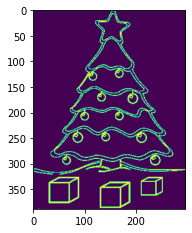

In [2]:
%matplotlib inline
from skimage.transform import hough_line
from scipy import misc
from imageio import imread
import matplotlib.pyplot as plt
import numpy as np

# load the image
img = imread('images/xmas.png')
#img = np.zeros((30,30))
#img[20,10] = 255
radius = 10
acc = np.zeros((6000,6000,20))
scale = 0.1
for r in range(8,12):
    print("R:", r)
    for y,x in np.argwhere(img==255):#np.ndindex((20,290)):#img.shape):
        print(y, end='\r')
        for t in range(360):
            b = y - r * np.sin(t * np.pi/180)
            a = x - r * np.cos(t * np.pi/180)
            acc[int(b/scale), int(a/scale), r] += 1

plt.subplot(1,2,1)
plt.imshow(img)
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


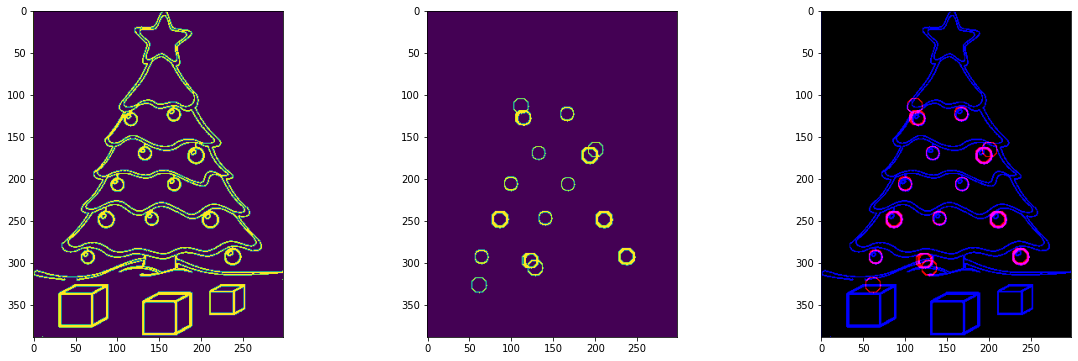

In [3]:
def draw_circle(array, x, y, r):
    for t in range(360):
        b = y - r * np.sin(t * np.pi/180)
        a = x - r * np.cos(t * np.pi/180)
        if (b>=0 and b<array.shape[0]) and (a>=0 and a<array.shape[1]):
            array[int(b),int(a)] = 255
    return array


threshold = 9
results = np.zeros(img.shape)
for y,x,r in np.argwhere(acc>threshold):
    results = draw_circle(results, int(x*scale),int(y*scale), r)

masked = np.zeros((img.shape[0], img.shape[1], 3))
masked[:,:,2] = img
masked[:,:,0] = results 

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.imshow(img)
plt.subplot(1,3,2)
plt.imshow(results)
plt.subplot(1,3,3)
plt.imshow(masked)
plt.show()


## Assignment 5: Application: Eye detection [Bonus]

**Bonus:** If you do this exercise, you may leave out one of the others.

**a)** It was suggested in the lecture, that circular Hough transform can be used to implement a simple
form of “eye tracking”. Try this using your webcam.

Hints:
* You may start with a single snapshot (or some other image of a face from wherever you like) before applying your function to a video stream.
* You may start using functions like `hough_circle` from `skimage.transform`, which implement circular Hough transform.
* You may try to apply some preprocessing to detect edges or regions prior to Hough transform (you may use anything you know from the lecture).
* `hough_circle` may be inappropriate, as it is designed to detect full circles, while eyes are often partially occluded. You may implement your own Hough transforms, which detects this kind of incomplete circles.
* You may apply additional knowledge to detect eyes, e.g. that they usually occur in pairs. You may also use the approximate size and position from last frame.

In [ ]:
# imageio
%matplotlib notebook
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import imageio
import numpy as np
from skimage.filters import gaussian
from skimage.feature import canny
from skimage.color import rgb2gray
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.draw import circle_perimeter

# we use visvis for a bit better performance compared to matplotlib
import visvis as vv


# List of radii we compute hough transform for. Ideally we adjust for the perfect radius.
hough_radii = [10]
    
def detect_eyes(img):
    """Find pairs of eyes in image based on circular Hough transform.
    
    Args:
        img (ndarray): The RGB input image to detect the eyes in. shape=(h, w, 3)
        
    Returns:
        ndarray: The image with detected eyes highlighted.
    
    """
    # YOUR CODE HERE

try:
    display(HTML("press <kbd>I</kbd>, <kbd>I</kbd> (Kernel Interrupt) to stop the demo!"))
    with imageio.get_reader('<video0>') as webcam:
        t = vv.imshow(webcam.get_next_data(), clim=(0, 255))

        while True:
            img = webcam.get_next_data()
            vv.processEvents()
            # subsample the image also for performance
            detect_eyes(img[::2,::2,:])
            t.SetData(img)
except KeyboardInterrupt:
    print("Interrupted")
finally:
    webcam.close()
    plt.close(fig)
    print("Camera was closed.")
    